In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

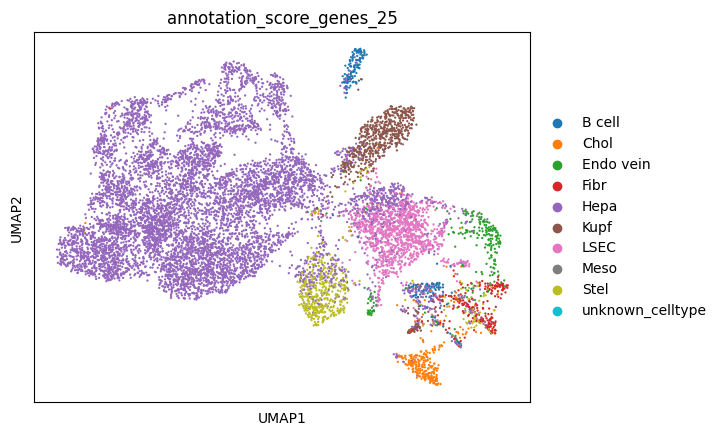

              atlas  annotation_score_genes_25
B cell     0.006215                   0.019505
Chol       0.026733                   0.025116
Hepa       0.579985                   0.701372
Kupf       0.032037                   0.058603
LSEC       0.092414                   0.107588
Meso       0.027965                   0.001158
Endo vein  0.031662                   0.020663
Fibr       0.030430                   0.020306
Stel       0.137683                   0.045511
categories: B cell, Chol, Endo vein, etc.
var_group_labels: hepa, hepa_chol_stel_fibr, hepa, etc.


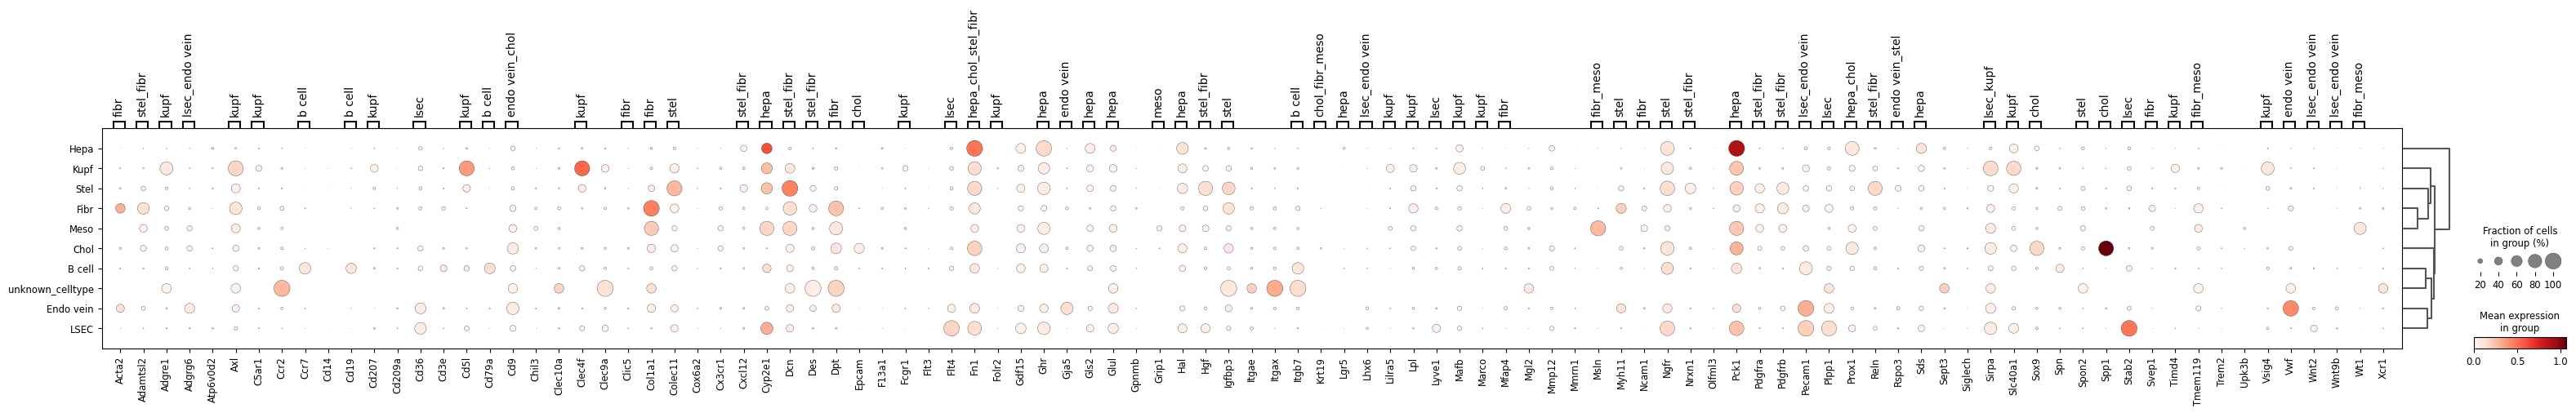

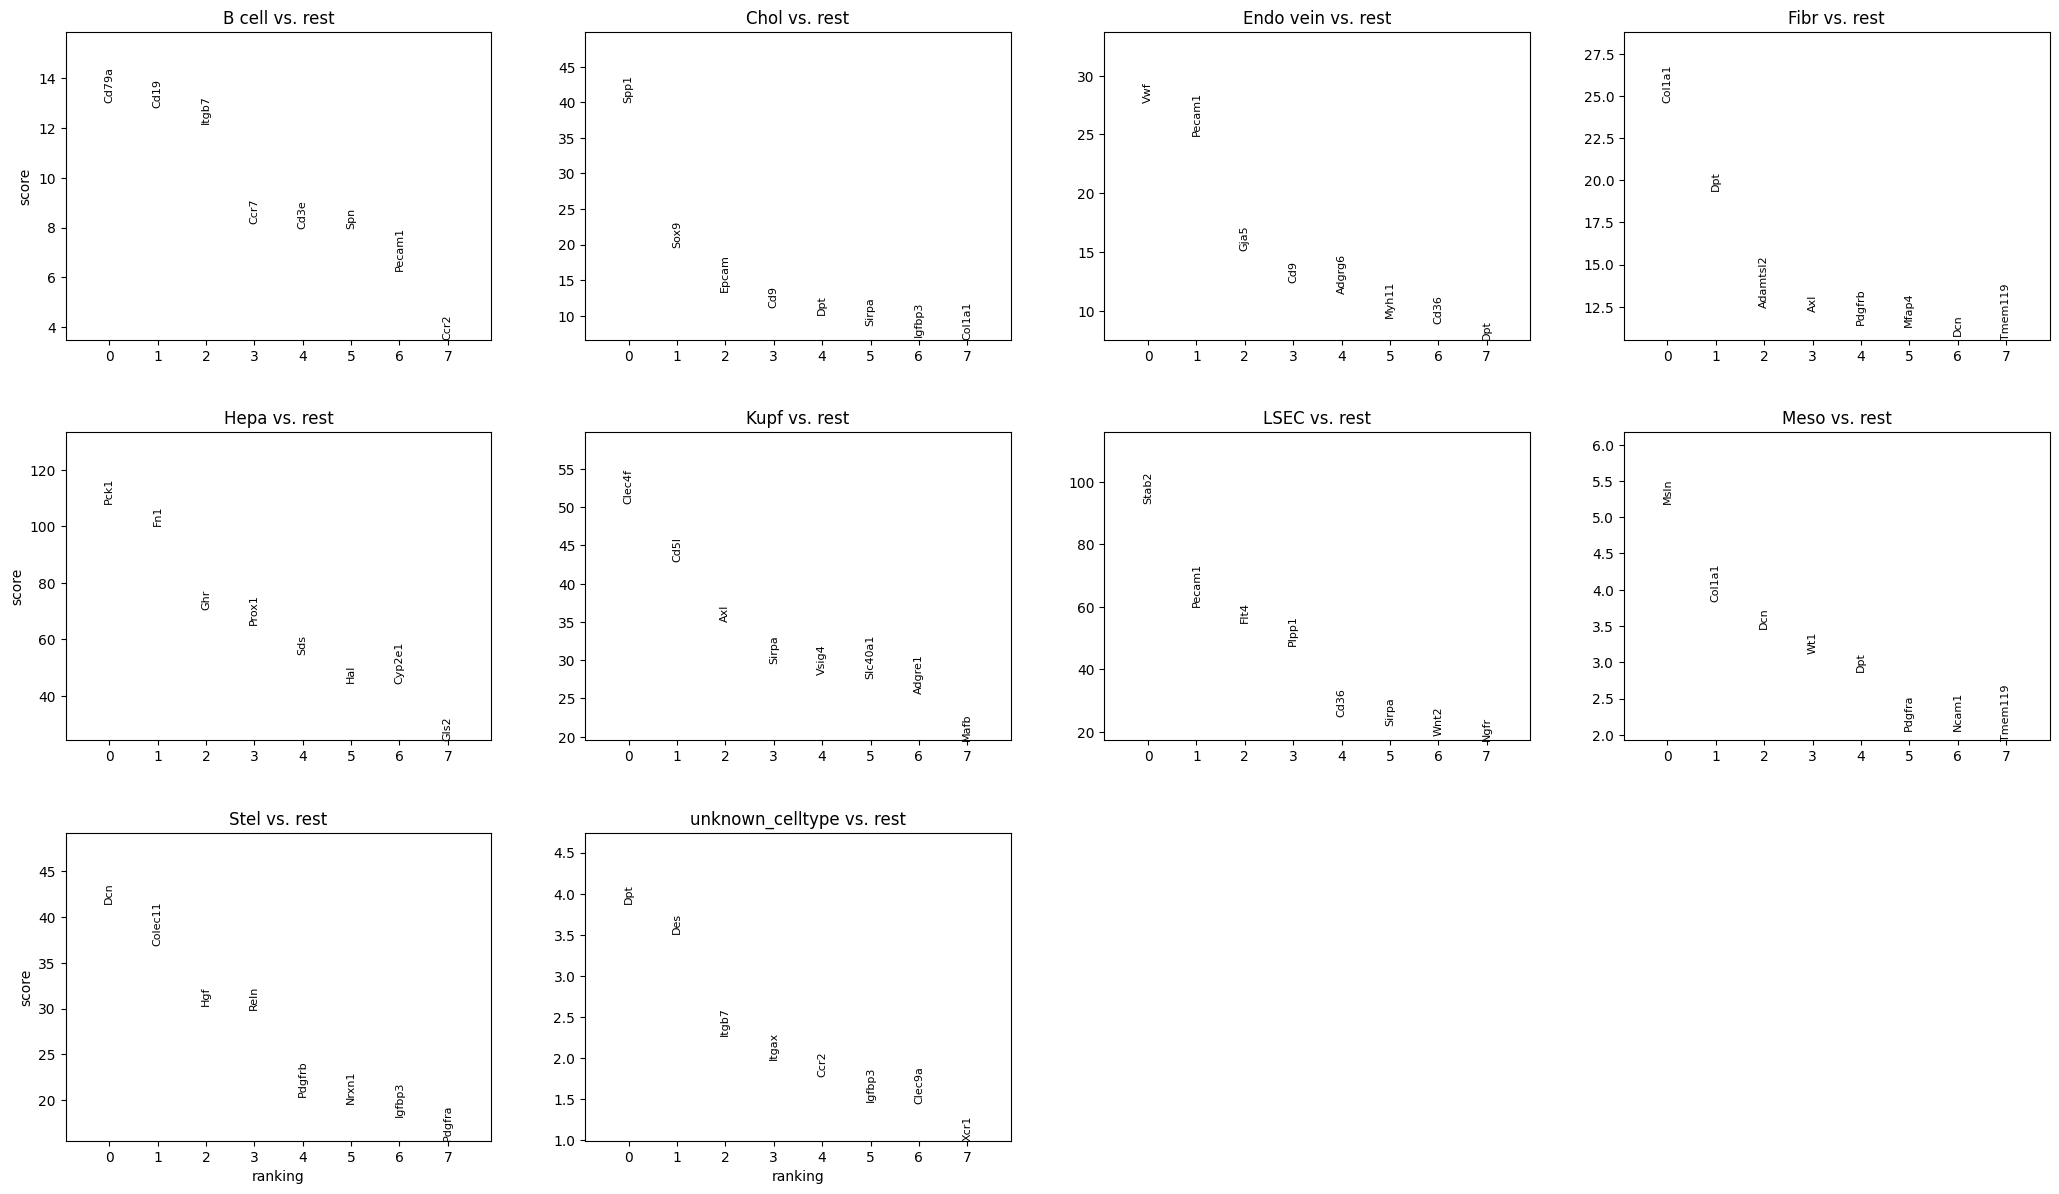

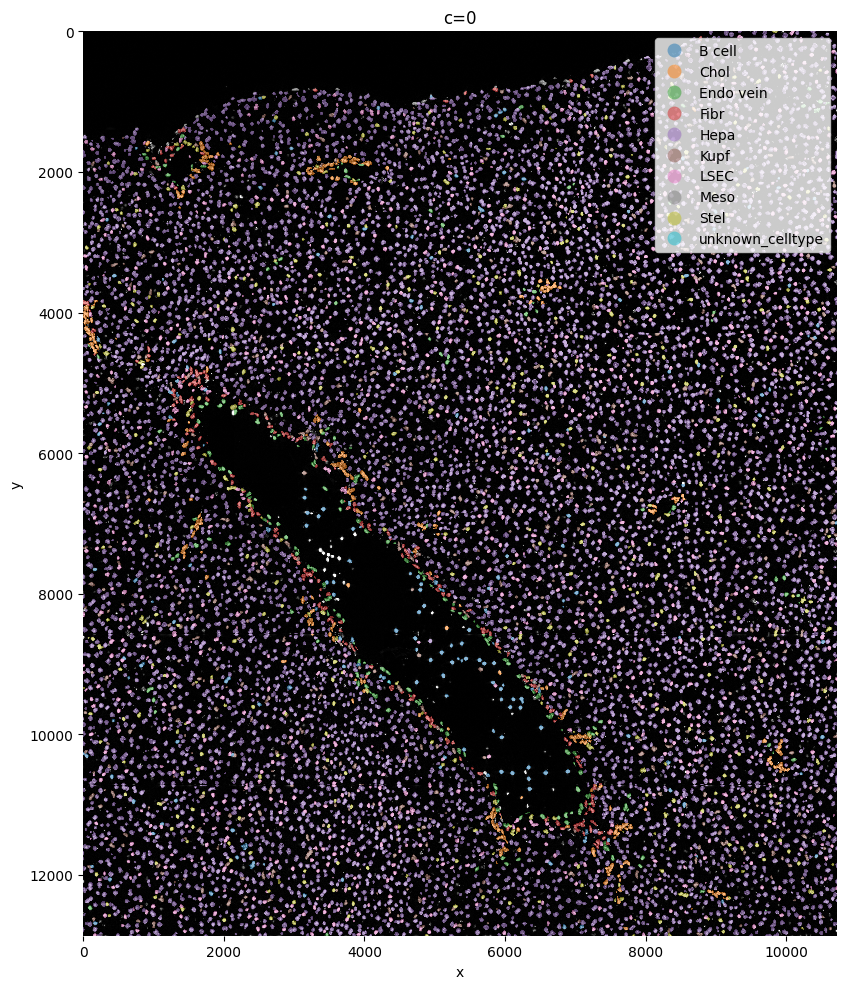

In [4]:
# Do score_genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv")

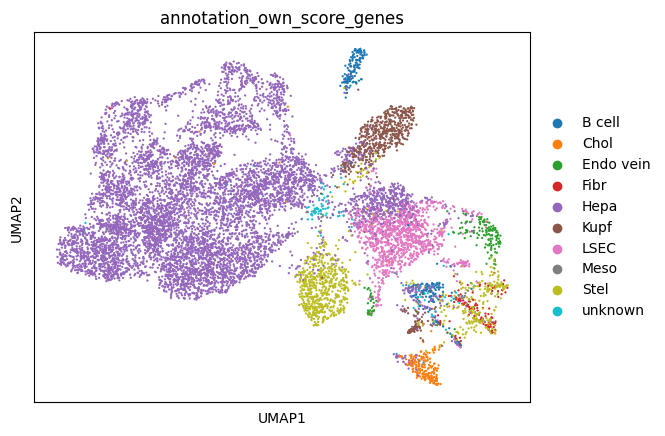

              atlas  annotation_own_score_genes
B cell     0.006215                    0.022889
Chol       0.026733                    0.018792
Hepa       0.579985                    0.685607
Kupf       0.032037                    0.057178
LSEC       0.092414                    0.099483
Meso       0.027965                    0.003384
Endo vein  0.031662                    0.014874
Fibr       0.030430                    0.009797
Stel       0.137683                    0.078375


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.536893,0.000000,0.018476,0.068247,0.020264,0.032274,0.015266,0.0,0.000000
1,0.132184,0.045767,0.000000,0.000000,0.361570,0.009912,0.242203,0.0,0.392005
2,0.128706,0.000000,0.000000,0.012307,0.020269,0.024728,0.358542,0.0,0.685175
3,0.197457,0.000000,0.000000,0.028096,0.000000,0.025705,0.178748,0.0,0.237066
4,0.232147,0.000000,0.000000,0.053522,0.000000,0.055269,0.016683,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.309270,0.000000,0.000000,0.045819,0.000000,0.060015,0.015148,0.0,0.000000
11224,0.506973,0.000000,0.000000,0.062634,0.048775,0.070629,0.021619,0.0,0.000000
11225,0.350109,0.000000,0.000000,0.045267,0.049173,0.017246,0.008158,0.0,0.000000
11226,0.034348,0.000000,0.000000,0.008226,0.059453,0.587182,0.184023,0.0,0.000000


In [5]:
# With norm_expr_var = True and norm_cell_type_score = True
scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

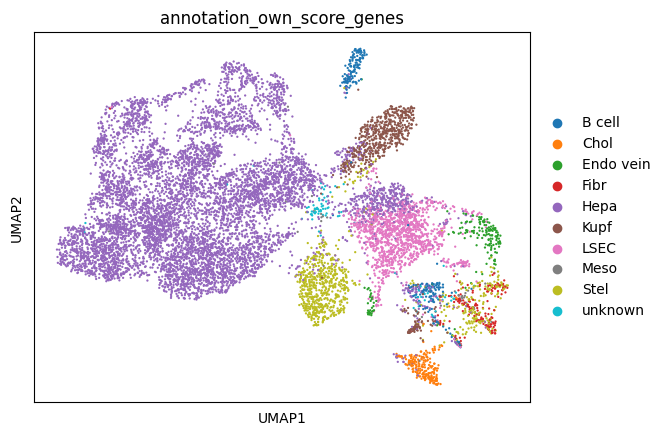

              atlas  annotation_own_score_genes
B cell     0.006215                    0.024225
Chol       0.026733                    0.019772
Hepa       0.579985                    0.674653
Kupf       0.032037                    0.057357
LSEC       0.092414                    0.110082
Meso       0.027965                    0.004097
Endo vein  0.031662                    0.015675
Fibr       0.030430                    0.013983
Stel       0.137683                    0.072230


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,0.000000,0.021096,0.085765,0.021767,0.033361,0.020318,0.0,0.000000
1,0.132747,0.055902,0.000000,0.000000,0.376261,0.010282,0.241621,0.0,0.526007
2,0.129953,0.000000,0.000000,0.015805,0.019384,0.023986,0.274330,0.0,0.717227
3,0.199726,0.000000,0.000000,0.036456,0.000000,0.026570,0.154209,0.0,0.229382
4,0.234711,0.000000,0.000000,0.069145,0.000000,0.056901,0.022204,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.313497,0.000000,0.000000,0.059235,0.000000,0.061714,0.020161,0.0,0.000000
11224,0.511616,0.000000,0.000000,0.081015,0.051679,0.072720,0.028773,0.0,0.000000
11225,0.354052,0.000000,0.000000,0.058203,0.049886,0.017826,0.010857,0.0,0.000000
11226,0.034453,0.000000,0.000000,0.010674,0.063038,0.602880,0.242782,0.0,0.000000


In [6]:
# With norm_expr_var = False and norm_cell_type_score = True
scores = own_score_genes(sdata,path_mg,norm_expr_var=False,norm_cell_type_score=True)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

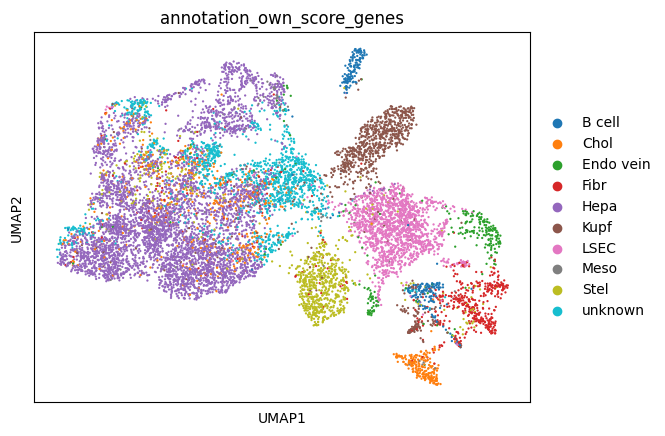

              atlas  annotation_own_score_genes
B cell     0.006215                    0.027699
Chol       0.026733                    0.063769
Hepa       0.579985                    0.414143
Kupf       0.032037                    0.080780
LSEC       0.092414                    0.136088
Meso       0.027965                    0.009797
Endo vein  0.031662                    0.024225
Fibr       0.030430                    0.047738
Stel       0.137683                    0.073744


In [7]:
# With norm_expr_var = True and norm_cell_type_score = False
own_score_genes(sdata,path_mg,norm_expr_var=True,norm_cell_type_score=False)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)